In [45]:
"""
Name: Potential-Performance-Predictor
Project Group Number: 19
Clustering
"""

'\nName: Potential-Performance-Predictor\nProject Group Number: 19\nClustering\n'

In [46]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display_html
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

In [47]:
# First, let us load datasets to use for KMeans
data = pd.read_csv('Dataset/HR-Employee-Attrition.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [48]:
#Dropping the values which aren't impactful or cannot be obtained of a new employee or repetative data
df = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','OverTime','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','Attrition','DailyRate','MonthlyRate','HourlyRate'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   Department                1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EducationField            1470 non-null   object
 6   Gender                    1470 non-null   object
 7   JobLevel                  1470 non-null   int64 
 8   JobRole                   1470 non-null   object
 9   MaritalStatus             1470 non-null   object
 10  MonthlyIncome             1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  RelationshipSatisfaction  1470 non-null   int64 
 13  StockOptionLevel          1470 non-null   int64 
 14  TotalWorkingYears       

In [49]:
# Converting categorical data to numerical data
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

In [50]:
# Function to normalize data
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [51]:
# Normalizing the data
df.DistanceFromHome = norm_func(df.DistanceFromHome)
df.MonthlyIncome = norm_func(df.MonthlyIncome)

df = StandardScaler().fit_transform(df) 

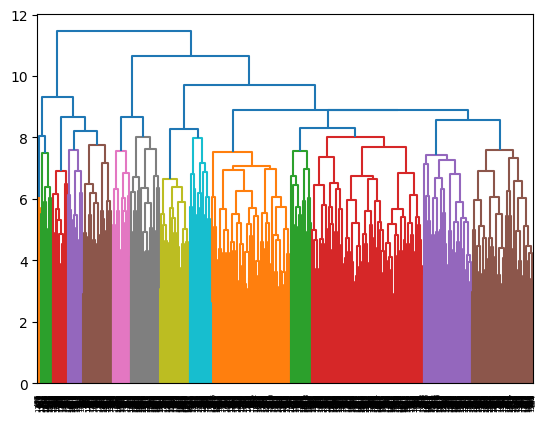

In [52]:
# Creating a complete linkage dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method='complete'))

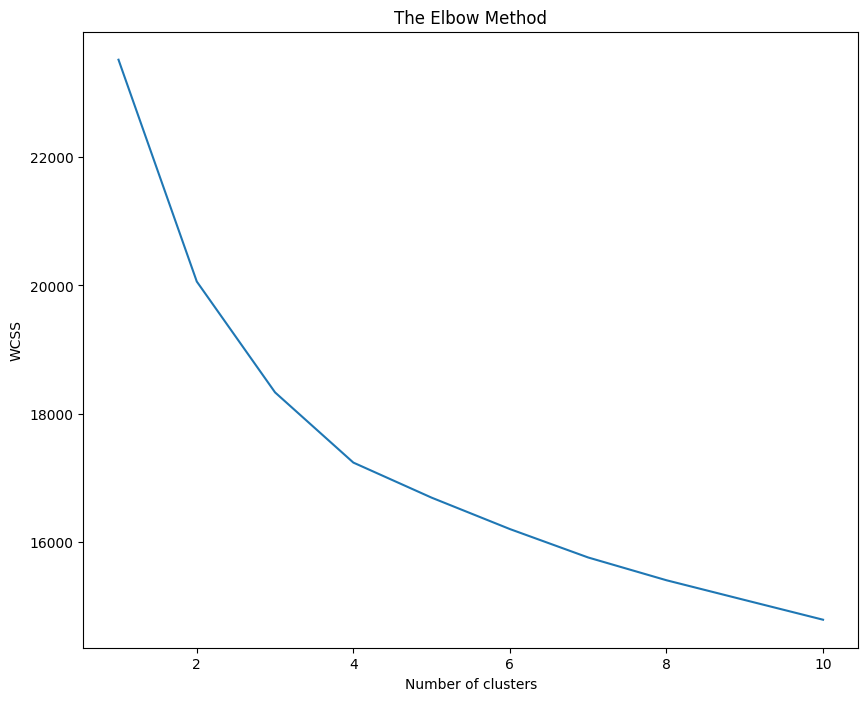

In [53]:
plt.figure(figsize=(10, 8))
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We will go with clusters = 4, as we interpret it from the elbow diagram.

In [54]:
number_clusters = 4

#K Means
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = 42)
kmeans_model = kmeans.fit(df)
y_kmeans = kmeans_model.predict(df)

#Hierarchical
hc = AgglomerativeClustering(n_clusters = number_clusters, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(df)

In [55]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1
y_hc1=y_hc+1

In [56]:
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
data['cluster_kmeans'] = cluster

cluster = list(y_hc1)
# Adding cluster to our data set
data['cluster_hc'] = cluster

In [57]:
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster_kmeans').mean(),1))
kmeans_mean_cluster

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster_hc
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,32.7,768.5,8.6,2.8,1.0,1022.2,2.7,65.4,2.7,1.4,2.7,3905.4,13925.1,2.1,15.3,3.2,2.8,80.0,0.1,7.5,2.8,2.7,5.1,3.3,1.4,3.4,2.0
2,36.7,829.5,9.8,3.0,1.0,1032.2,2.8,66.8,2.8,1.7,2.7,4682.0,14320.9,3.1,15.4,3.2,2.6,80.0,1.4,9.4,2.7,2.7,5.8,3.9,1.8,3.8,2.3
3,34.7,805.2,9.3,2.9,1.0,1050.0,2.7,64.9,2.7,2.0,2.8,5689.1,14367.8,2.4,15.1,3.1,2.7,80.0,0.8,8.7,2.9,2.8,6.0,4.1,1.9,3.8,2.6
4,47.3,805.4,9.0,3.1,1.0,977.8,2.7,66.4,2.7,4.0,2.7,15141.9,14840.4,3.4,15.0,3.1,2.9,80.0,0.7,24.6,2.7,2.8,13.7,6.7,4.7,6.3,1.4


In [58]:
hierarchical_cluster  = pd.DataFrame(round(data.groupby('cluster_hc').mean(),1))
hierarchical_cluster

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster_kmeans
cluster_hc,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,47.8,799.2,8.4,3.1,1.0,985.0,2.7,66.5,2.7,3.9,2.7,14659.0,14606.0,3.9,15.0,3.2,3.0,80.0,0.7,24.4,2.7,2.8,12.9,6.5,4.4,5.9,3.8
2,34.4,791.7,8.7,2.9,1.0,1027.8,2.7,65.3,2.7,1.6,2.7,4608.9,14169.0,2.4,15.2,3.2,2.7,80.0,0.6,8.4,2.8,2.8,5.7,3.8,1.7,3.7,1.9
3,37.4,853.0,7.1,2.8,1.0,1069.3,2.9,66.1,2.7,2.3,2.7,7556.8,14221.2,2.9,15.2,3.1,2.6,80.0,1.6,12.0,2.9,2.7,8.2,4.8,2.4,4.9,2.4
4,36.6,828.7,15.3,3.2,1.0,1023.7,2.6,68.4,2.7,1.9,2.8,5458.0,14882.4,2.8,15.3,3.1,2.7,80.0,1.3,9.5,2.9,2.7,5.3,3.4,1.5,3.3,2.7


In [59]:
def cluster_characteristics(cluster):
    return (cluster.describe().iloc[1].to_frame().T.to_html()) \
    + ('-----------Attrition-----------') \
    + (cluster['Attrition'].value_counts().to_frame().T.to_html()) \
    + ('-----------BusinessTravel-----------') \
    + (cluster['BusinessTravel'].value_counts().to_frame().T.to_html()) \
    + ('-----------Department-----------') \
    + (cluster['Department'].value_counts().to_frame().T.to_html()) \
    + ('-----------EducationField-----------') \
    + (cluster['EducationField'].value_counts().to_frame().T.to_html()) \
    + ('-----------Gender-----------') \
    + (cluster['Gender'].value_counts().to_frame().T.to_html()) \
    + ('-----------JobRole-----------') \
    + (cluster['JobRole'].value_counts().to_frame().T.to_html()) \
    + ('-----------MaritalStatus-----------') \
    + (cluster['MaritalStatus'].value_counts().to_frame().T.to_html())

In [60]:
#Dropping unnecessary columns

def drop_unnecessary_columns (cluster):
    cluster = cluster.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','JobInvolvement','OverTime','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','DailyRate','MonthlyRate','HourlyRate','cluster_kmeans','cluster_hc'], axis=1)
    return cluster

In [61]:
kmeans_clusters = []
for i in range(1, number_clusters+1):
    kmeans_clusters.append(drop_unnecessary_columns(data[data.cluster_kmeans == i]))

hierarchical_clusters = []
for i in range(1, number_clusters+1):
    hierarchical_clusters.append(drop_unnecessary_columns(data[data.cluster_hc == i]))

In [62]:

def print_all_clusters(clusters):
    html_string = '<h1>Clustering Results</h1> <br/>'
    index = 1
    for cluster in clusters:
        html_string += '<h1>Cluster ' + str(index) + '</h1>'
        html_string += cluster_characteristics(cluster)
        html_string += '<br/>'
        index += 1

    display_html(html_string, raw=True)

In [63]:

print_all_clusters (kmeans_clusters)

Clustering Results Cluster 1 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 RelationshipSatisfaction 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 32.745636 
 8.568579 
 2.778055 
 2.698254 
 1.406484 
 2.74813 
 3905.369077 
 2.064838 
 2.793017 
 0.147132 
 7.451372 
 3.256858 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 311 
 90 
 
 
 -----------BusinessTravel----------- 
 
 
 
 Travel_Rarely 
 Travel_Frequently 
 Non-Travel 
 
 
 
 
 BusinessTravel 
 295 
 74 
 32 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Human Resources 
 
 
 
 
 Department 
 376 
 25 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Technical Degree 
 Other 
 Human Resources 
 
 
 
 
 EducationField 
 185 
 140 
 40 
 26 
 10 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 239 
 162 
 
 
 -----------JobRole----------- 
 
 
 
 Research Scientist 
 Laboratory Technician 
 Manufacturing Director 
 Healthcare Representative 
 Human Resources 
 Research Director 
 Manager 
 
 
 
 
 JobRole 
 166 
 124 
 50 
 31 
 25 
 4 
 1 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Single 
 Married 
 
 
 
 
 MaritalStatus 
 271 
 130 
 
 
 Cluster 2 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 RelationshipSatisfaction 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 36.749431 
 9.769932 
 2.961276 
 2.785877 
 1.653759 
 2.694761 
 4681.977221 
 3.111617 
 2.599089 
 1.441913 
 9.430524 
 3.856492 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 395 
 44 
 
 
 -----------BusinessTravel----------- 
 
 
 
 Travel_Rarely 
 Travel_Frequently 
 Non-Travel 
 
 
 
 
 BusinessTravel 
 299 
 84 
 56 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Human Resources 
 Sales 
 
 
 
 
 Department 
 410 
 25 
 4 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Technical Degree 
 Other 
 Human Resources 
 Marketing 
 
 
 
 
 EducationField 
 195 
 158 
 42 
 31 
 11 
 2 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 283 
 156 
 
 
 -----------JobRole----------- 
 
 
 
 Laboratory Technician 
 Research Scientist 
 Healthcare Representative 
 Manufacturing Director 
 Human Resources 
 Research Director 
 Manager 
 Sales Executive 
 
 
 
 
 JobRole 
 133 
 125 
 72 
 69 
 25 
 8 
 4 
 3 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Married 
 Divorced 
 
 
 
 
 MaritalStatus 
 237 
 202 
 
 
 Cluster 3 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 RelationshipSatisfaction 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 34.734908 
 9.286089 
 2.905512 
 2.692913 
 1.979003 
 2.779528 
 5689.068241 
 2.380577 
 2.661417 
 0.761155 
 8.740157 
 4.060367 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 297 
 84 
 
 
 -----------BusinessTravel----------- 
 
 
 
 Travel_Rarely 
 Travel_Frequently 
 Non-Travel 
 
 
 
 
 BusinessTravel 
 265 
 74 
 42 
 
 
 -----------Department----------- 
 
 
 
 Sales 
 
 
 
 
 Department 
 381 
 
 
 -----------EducationField----------- 
 
 
 
 Marketing 
 Life Sciences 
 Medical 
 Technical Degree 
 Other 
 
 
 
 
 EducationField 
 131 
 126 
 79 
 30 
 15 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 226 
 155 
 
 
 -----------JobRole----------- 
 
 
 
 Sales Executive 
 Sales Representative 
 
 
 
 
 JobRole 
 298 
 83 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Married 
 Single 
 Divorced 
 
 
 
 
 MaritalStatus 
 173 
 136 
 72 
 
 
 Cluster 4 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 

In [64]:

print_all_clusters (hierarchical_clusters)

Clustering Results Cluster 1 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 RelationshipSatisfaction 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 47.811659 
 8.372197 
 3.089686 
 2.695067 
 3.887892 
 2.730942 
 14659.035874 
 3.883408 
 2.977578 
 0.663677 
 24.38565 
 6.493274 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 203 
 20 
 
 
 -----------BusinessTravel----------- 
 
 
 
 Travel_Rarely 
 Travel_Frequently 
 Non-Travel 
 
 
 
 
 BusinessTravel 
 170 
 37 
 16 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Sales 
 Human Resources 
 
 
 
 
 Department 
 154 
 60 
 9 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Marketing 
 Technical Degree 
 Other 
 Human Resources 
 
 
 
 
 EducationField 
 86 
 81 
 25 
 17 
 11 
 3 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 125 
 98 
 
 
 -----------JobRole----------- 
 
 
 
 Manager 
 Research Director 
 Healthcare Representative 
 Sales Executive 
 Manufacturing Director 
 Laboratory Technician 
 Human Resources 
 Research Scientist 
 
 
 
 
 JobRole 
 84 
 54 
 30 
 26 
 21 
 4 
 3 
 1 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Married 
 Single 
 Divorced 
 
 
 
 
 MaritalStatus 
 116 
 62 
 45 
 
 
 Cluster 2 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 RelationshipSatisfaction 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 34.360879 
 8.731172 
 2.856695 
 2.728033 
 1.629707 
 2.725941 
 4608.932008 
 2.358787 
 2.667364 
 0.626569 
 8.393305 
 3.756276 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 769 
 187 
 
 
 -----------BusinessTravel----------- 
 
 
 
 Travel_Rarely 
 Travel_Frequently 
 Non-Travel 
 
 
 
 
 BusinessTravel 
 742 
 168 
 46 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Sales 
 Human Resources 
 
 
 
 
 Department 
 650 
 267 
 39 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Technical Degree 
 Marketing 
 Other 
 Human Resources 
 
 
 
 
 EducationField 
 395 
 301 
 99 
 82 
 63 
 16 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 592 
 364 
 
 
 -----------JobRole----------- 
 
 
 
 Research Scientist 
 Laboratory Technician 
 Sales Executive 
 Manufacturing Director 
 Healthcare Representative 
 Sales Representative 
 Human Resources 
 Research Director 
 Manager 
 
 
 
 
 JobRole 
 252 
 217 
 201 
 99 
 70 
 65 
 39 
 9 
 4 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Married 
 Single 
 Divorced 
 
 
 
 
 MaritalStatus 
 420 
 379 
 157 
 
 
 Cluster 3 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 RelationshipSatisfaction 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 37.397163 
 7.099291 
 2.758865 
 2.851064 
 2.297872 
 2.687943 
 7556.787234 
 2.914894 
 2.58156 
 1.595745 
 11.971631 
 4.751773 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 133 
 8 
 
 
 -----------BusinessTravel----------- 
 
 
 
 Travel_Rarely 
 Non-Travel 
 Travel_Frequently 
 
 
 
 
 BusinessTravel 
 56 
 49 
 36 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Human Resources 
 Sales 
 
 
 
 
 Department 
 120 
 15 
 6 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Technical Degree 
 Human Resources 
 Other 
 Marketing 
 
 
 
 
 EducationField 
 69 
 51 
 8 
 8 
 4 
 1 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 88 
 53 
 
 
 -----------JobRole----------- 
 
 
 
 Laboratory Technician 
 Healthcare Representative 
 Manufacturing Director 
 Research Director 
 

Now, we will test bias using kmeans clustering by passing the same set of features but by just varying the features in question.
We want to test bias on following 4 features:

1. Age
2. Gender
3. Distance From Home 
4. Marital Status

In [72]:
new_employee_data = pd.read_csv('Dataset/new_employee_data.csv')
# Converting categorical data to numerical data
le = LabelEncoder()
new_employee_data['BusinessTravel'] = le.fit_transform(new_employee_data['BusinessTravel'])
new_employee_data['Department'] = le.fit_transform(new_employee_data['Department'])
new_employee_data['EducationField'] = le.fit_transform(new_employee_data['EducationField'])
new_employee_data['Gender'] = le.fit_transform(new_employee_data['Gender'])
new_employee_data['JobRole'] = le.fit_transform(new_employee_data['JobRole'])
new_employee_data['MaritalStatus'] = le.fit_transform(new_employee_data['MaritalStatus'])
kmeans_model.predict(new_employee_data)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3], dtype=int32)